In [ ]:
!pip install scikit-fda FDApy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import skfda
import matplotlib.pyplot as plt
import FDApy


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
USA_HPI = pd.read_csv('/content/drive/MyDrive/MURL Project/Seasonally Adjusted Housing Price Index USA by Year.csv')

In [ ]:
USA_HPI

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,100.00,102.23,104.25,107.77,110.49,113.96,116.78,121.00,128.38,137.00,...,210.27,222.17,234.77,250.92,264.12,279.95,314.68,371.63,391.35,417.43
1,100.45,102.97,104.07,108.01,111.11,114.13,117.09,121.87,128.92,136.84,...,211.91,222.34,236.05,252.65,264.69,281.80,317.40,377.20,394.30,422.86
2,100.48,102.81,104.38,108.36,110.93,114.54,117.55,122.27,129.49,137.89,...,212.51,223.92,237.42,253.45,265.52,282.23,321.94,381.53,395.84,423.15
3,100.33,102.56,105.02,108.69,111.20,114.80,117.76,122.82,130.12,138.83,...,213.26,225.10,239.21,254.13,266.77,282.62,326.81,386.47,398.10,424.51
4,100.38,102.58,105.24,109.04,111.35,115.06,118.20,123.30,130.88,139.40,...,214.52,226.06,240.35,255.36,268.00,281.55,332.04,389.88,401.01,424.65
5,100.50,102.51,105.61,109.23,111.73,115.16,118.25,124.09,131.49,140.36,...,215.35,227.29,241.24,256.43,268.94,284.60,338.06,390.64,403.33,424.66
6,100.54,102.86,105.67,109.35,112.25,115.56,118.55,124.42,132.22,141.10,...,216.35,228.47,242.56,257.47,269.97,288.62,343.33,388.85,406.81,425.21
7,100.37,103.32,106.05,109.61,112.54,115.56,119.00,124.94,133.02,141.64,...,216.83,229.57,244.13,258.79,271.07,293.66,347.48,387.67,409.97,0.00
8,100.61,103.71,106.45,109.69,112.78,115.86,119.15,125.73,133.40,142.49,...,217.86,230.83,245.25,259.20,272.67,298.42,351.13,388.73,413.13,0.00
9,100.91,104.03,106.65,109.96,112.83,115.97,119.77,126.26,134.20,143.29,...,219.09,232.07,246.21,260.13,274.03,303.08,355.78,389.41,414.74,0.00


In [ ]:
grid_points = np.arange(0, len(USA_HPI.index))
data_matrix = USA_HPI.T.drop('2024').to_numpy().astype(np.float64)

In [ ]:
USA_HPI_FD = skfda.FDataGrid(data_matrix = data_matrix, grid_points = grid_points)

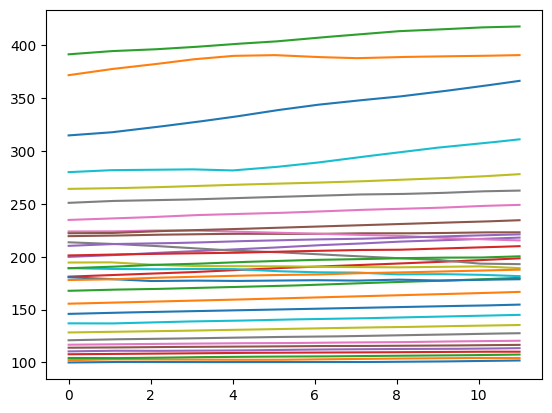

In [ ]:
USA_HPI_FD.plot().show()

In [ ]:
USA_HPI_Norm = []

for column in USA_HPI.columns:
  USA_HPI_Norm.append(USA_HPI[column] * (100 / USA_HPI[column][0]))

USA_HPI_Norm = pd.DataFrame(USA_HPI_Norm).T
USA_HPI_Norm

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.45,100.723858,99.827338,100.222696,100.561137,100.149175,100.265456,100.719008,100.420626,99.883212,...,100.779950,100.076518,100.545214,100.689463,100.215811,100.660832,100.864370,101.498803,100.753801,101.300817
2,100.48,100.567348,100.124700,100.547462,100.398226,100.508951,100.659359,101.049587,100.864621,100.649635,...,101.065297,100.787685,101.128764,101.008289,100.530062,100.814431,102.307106,102.663940,101.147311,101.370290
3,100.33,100.322802,100.738609,100.853670,100.642592,100.737101,100.839185,101.504132,101.355351,101.335766,...,101.421981,101.318810,101.891213,101.279292,101.003332,100.953742,103.854710,103.993219,101.724799,101.696093
4,100.38,100.342365,100.949640,101.178436,100.778351,100.965251,101.215962,101.900826,101.947344,101.751825,...,102.021211,101.750911,102.376794,101.769488,101.469029,100.571531,105.516715,104.910798,102.468379,101.729631
5,100.50,100.273892,101.304556,101.354737,101.122274,101.053001,101.258777,102.553719,102.422496,102.452555,...,102.415941,102.304542,102.755889,102.195919,101.824928,101.661011,107.429770,105.115303,103.061198,101.732027
6,100.54,100.616257,101.362110,101.466085,101.592904,101.404001,101.515670,102.826446,102.991120,102.992701,...,102.891520,102.835666,103.318141,102.610394,102.214902,103.096982,109.104487,104.633641,103.950428,101.863786
7,100.37,101.066223,101.726619,101.707340,101.855372,101.404001,101.901010,103.256198,103.614270,103.386861,...,103.119798,103.330783,103.986881,103.136458,102.631380,104.897303,110.423287,104.316121,104.757889,0.000000
8,100.61,101.447716,102.110312,101.781572,102.072586,101.667252,102.029457,103.909091,103.910266,104.007299,...,103.609645,103.897916,104.463943,103.299857,103.237165,106.597607,111.583196,104.601351,105.565351,0.000000
9,100.91,101.760736,102.302158,102.032105,102.117839,101.763777,102.560370,104.347107,104.533416,104.591241,...,104.194607,104.456047,104.872854,103.670493,103.752082,108.262190,113.060887,104.784328,105.976747,0.000000


In [ ]:
grid_points = np.arange(0, len(USA_HPI_Norm.index))
data_matrix = USA_HPI_Norm.T.drop('2024').to_numpy().astype(np.float64)

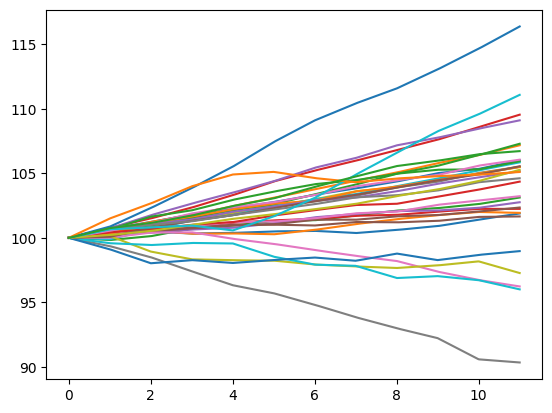

In [ ]:
USA_HPI_Norm_FD = skfda.FDataGrid(data_matrix = data_matrix, grid_points = grid_points)

USA_HPI_Norm_FD.plot(colormap = 'gnuplot2').show()